# Supervised learning example: Simple linear regression

Let's consider a simple linear regression — that is, the common case of fitting a line to (x,y) data. We will use the following simple data for our regression example:

## Overall process (Basics of the API)
The steps in using the Scikit-Learn estimator API are as follows:

- Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
- Choose model hyperparameters by instantiating this class with desired values.
- Arrange data into a features matrix and target vector following the discussion above.
- Fit the model to your data by calling the fit() method of the model instance.
- Apply the Model to new data:
    - For supervised learning, often we predict labels for unknown data using the predict() method.
    - For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.
    
Next generate some data to work on

[3.74540119 9.50714306 7.31993942 5.98658484 1.5601864  1.5599452
 0.58083612 8.66176146 6.01115012 7.08072578 0.20584494 9.69909852
 8.32442641 2.12339111 1.81824967 1.8340451  3.04242243 5.24756432
 4.31945019 2.9122914  6.11852895 1.39493861 2.92144649 3.66361843
 4.56069984 7.85175961 1.99673782 5.14234438 5.92414569 0.46450413
 6.07544852 1.70524124 0.65051593 9.48885537 9.65632033 8.08397348
 3.04613769 0.97672114 6.84233027 4.40152494 1.22038235 4.9517691
 0.34388521 9.09320402 2.58779982 6.62522284 3.11711076 5.20068021
 5.46710279 1.84854456]
[ 7.22926896 18.18565441 13.52423055 10.67206599  0.64185082  1.4000462
 -0.29896653 17.38064514 11.36591852 11.3984114  -0.26422614 18.01311476
 14.97193082  3.8584585   3.66749887  3.59937032  4.24562734  9.18591626
  7.9701638   5.80012793 10.75788366  1.60421824  3.736558    5.13103024
  8.93392551 16.05975926  2.92146552 10.28822167 11.2099274  -0.7161115
 11.51229264  3.94851904  0.26520582 19.5423544  15.69289556 15.98984947
  5.17

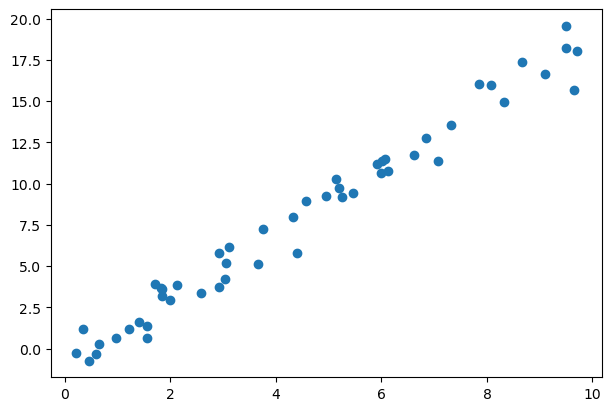

In [18]:
# TODO: 
# - Define to plot inline, import matplotlib and numpy
# - Setup random generator to seed 42
# - Generate 50 random samples (=x) in the range 0-10 (use rand)
# - Generate corresponding y values with some noise (use randn-function for noise)
#   y = 2x - 1 + noise
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)

print(x)
print(y)

# TODO:
# - Plot a scatter plot x versus y
fig, ax = plt.subplots(figsize=(6,4), layout="constrained")
ax.scatter(x, y)
plt.show()

## 1. Choose a class of model
In Scikit-Learn, every class of model is represented by a Python class. So, for example, if we would like to compute a simple linear regression model, we can import the linear regression class:

> Note that other more general linear regression models exist as well

In [8]:
# TODO: 
# - import LinearRegression model from sklearn linear_model
from sklearn import linear_model




## 2. Choose model hyperparameters
An important point is that a class of model is not the same as an instance of a model.

Once we have decided on our model class, there are still some options open to us. Depending on the model class we are working with, we might need to answer one or more questions like the following:

- Would we like to fit for the offset (i.e., y-intercept)?
- Would we like the model to be normalized?
- Would we like to preprocess our features to add model flexibility?
- What degree of regularization would we like to use in our model?
- How many model components would we like to use?

These are examples of the important choices that must be made once the model class is selected. These choices are often represented as hyperparameters, or parameters that must be set before the model is fit to data. In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation. We will explore how you can quantitatively motivate the choice of hyperparameters in Hyperparameters and Model Validation.

For our linear regression example, we can instantiate the LinearRegression class and specify that we would like to fit the intercept using the fit_intercept hyperparameter:

In [35]:
# TODO: 
# - choose model hyperparameters as 'fit-intercept'
model = linear_model.LinearRegression(fit_intercept=True)
print(model)

LinearRegression()


Keep in mind that when the model is instantiated, the only action is the storing of these hyperparameter values. In particular, we have not yet applied the model to any data: the Scikit-Learn API makes very clear the distinction between choice of model and application of model to data.

## 3. Arrange data into a features matrix and target vector
Previously we detailed the Scikit-Learn data representation, which requires a two-dimensional features matrix and a one-dimensional target array. Here our target variable y is already in the correct form (a length-n_samples array), but we need to massage the data x to make it a matrix of size [n_samples, n_features]. In this case, this amounts to a simple reshaping of the one-dimensional array:

In [36]:
# TODO:
# - arrange data to features matrix 
#   -> make it a matrix of size [n_samples, n_features]

# because currently it is not obvious, what kind of features to add to x
# i will add it just squares
X = np.column_stack((x, x**2))
print(f"X.shape: {X.shape}, x.shape: {x.shape}")
print(f"y.shape: {y.shape}")


X.shape: (50, 2), x.shape: (50,)
y.shape: (50,)


## 4. Fit the model to your data
Now it is time to apply our model to data. This can be done with the fit() method of the model:

In [37]:
# TODO:
# - apply the data to the model
model.fit(X, y)


LinearRegression()

This fit() command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore. In Scikit-Learn, by convention all model parameters that were learned during the fit() process have trailing underscores; for example in this linear model, we have the following:

In [40]:
# TODO:
# - check the slope and intercept of the model

intercept = model.intercept_
slope = model.coef_[0]

print(f"intercept: {intercept}, slope: {slope}")


intercept: -0.9244496022433486, slope: 1.9910183487521953


These two parameters represent the slope and intercept of the simple linear fit to the data. Comparing to the data definition, we see that they are very close to the input slope of 2 and intercept of -1.

One question that frequently comes up regards the uncertainty in such internal model parameters. In general, Scikit-Learn does not provide tools to draw conclusions from internal model parameters themselves: interpreting model parameters is much more a statistical modeling question than a machine learning question. Machine learning rather focuses on what the model predicts. If you would like to dive into the meaning of fit parameters within the model, other tools are available, including the Statsmodels Python package.

## 5. Predict labels for unknown data
Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set. In Scikit-Learn, this can be done using the predict() method. For the sake of this example, our "new data" will be a grid of x values, and we will ask what y values the model predicts:

In [41]:
# TODO:
# - generate some test data between -1..11 using linspace
xfit = np.linspace(-1, 11, 50)
print(xfit)


[-1.         -0.75510204 -0.51020408 -0.26530612 -0.02040816  0.2244898
  0.46938776  0.71428571  0.95918367  1.20408163  1.44897959  1.69387755
  1.93877551  2.18367347  2.42857143  2.67346939  2.91836735  3.16326531
  3.40816327  3.65306122  3.89795918  4.14285714  4.3877551   4.63265306
  4.87755102  5.12244898  5.36734694  5.6122449   5.85714286  6.10204082
  6.34693878  6.59183673  6.83673469  7.08163265  7.32653061  7.57142857
  7.81632653  8.06122449  8.30612245  8.55102041  8.79591837  9.04081633
  9.28571429  9.53061224  9.7755102  10.02040816 10.26530612 10.51020408
 10.75510204 11.        ]


As before, we need to coerce these x values into a [n_samples, n_features] features matrix, after which we can feed it to the model:

In [46]:
# TODO:
# - predict the y values of xfit

Xfit = np.column_stack((xfit, xfit**2))
print(f"xfit.shape: {xfit.shape}, Xfit.shape: {Xfit.shape}")
yfit = model.predict(Xfit)


xfit.shape: (50,), Xfit.shape: (50, 2)


Finally, let's visualize the results by plotting first the raw data, and then this model fit:

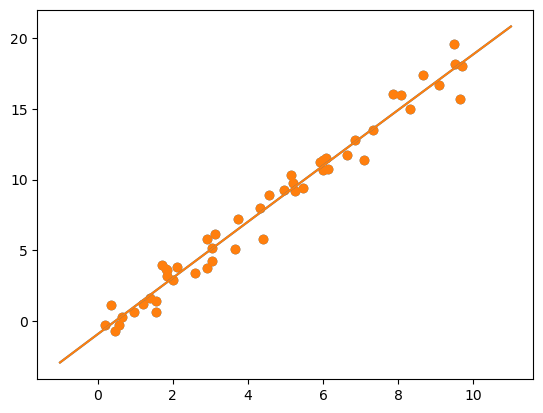

In [48]:
# TODO:
# - visualize the results against the original data
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.show()


Typically the efficacy of the model is evaluated by comparing its results to some known baseline, as we will see in the next example